# Guided Project: Exploring Hacker News Posts

## Introduction

In this project, we'll work with a dataset of submissions to popular technology site [Hacker News](https://news.ycombinator.com/).

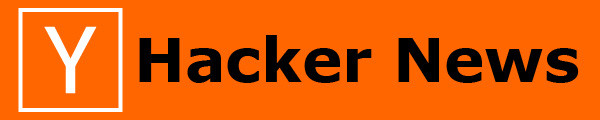

Hacker News is a site started by the startup incubator Y Combinator, where user-submitted stories (known as "posts") receive votes and comments, similar to reddit. Hacker News is extremely popular in technology and startup circles, and posts that make it to the top of the Hacker News listings can get hundreds of thousands of visitors as a result.

You can find the data set [here](https://www.kaggle.com/datasets/hacker-news/hacker-news-posts), but note that we have reduced from almost 300,000 rows to approximately 20,000 rows by removing all submissions that didn't receive any comments and then randomly sampling from the remaining submissions. You can download this downsampled data from the jupyter notebook workspace by clicking File -> Open -> hacker_news.csv -> File -> Download. 

Below are descriptions of the columns: 

* id: the unique identifier from Hacker News for the post
* title: the title of the post
* url: the URL that the posts links to, if the post has a URL
* num_points: the number of points the post acquired, calculated as the total number of upvotes minus the total number of downvotes
* num_comments: the number of comments on the post
* author: the username of the person who submitted the post
* created_at: the date and time of the post's submission

We're specifically interested in posts with titles that begin with either `Ask HN` or `Show HN`. Users submit `Ask HN` posts to ask the Hacker News community a specific question. Below are a few examples:

`
Ask HN: How to improve my personal website?
Ask HN: Am I the only one outraged by Twitter shutting down share counts?
Ask HN: Aby recent changes to CSS that broke mobile?
`

Likewise, users submit `Show HN` posts to show the Hacker News community a project, product, or just something interesting. Below are a few examples:

`
Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform'
Show HN: Something pointless I made
Show HN: Shanhu.io, a programming playground powered by e8vm
`

We'll compare these two types of posts to determine the following:

* Do `Ask HN` or `Show HN` receive more comments on average?
* Do posts created at a certain time receive more comments on average?

### Instructions

1. Read the hacker_news.csv file in as a list of lists.
      * Assign the result to the variable hn.
2. Display the first five rows of hn.

In [1]:
# Reading hacker_news csv file as a list of lists
from csv import reader
opened_file = open("hacker_news.csv")
read_file = reader(opened_file)
hn = list(read_file)

# Display the first five rows of hn
print(hn[:5])

[['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']]


## Removing Headers from a List of Lists

On the previous screen, we read our data into a list of lists called `hn`. When you displayed the first five rows of `hn`, you should've seen the following data:

`
[
    ['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at'], 
    ['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], 
    ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], 
    ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], 
    ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01']
]
`

Notice that the first list in the inner lists contains the column headers, and the lists after contain the data for one row. In order to analyze our data, we need to first remove the row containing the column headers.

### Instructions

1. Extract the first row of data, and assign it to the variable headers.
2. Remove the first row from hn.
3. Display headers.
4. Display the first five rows of hn to verify that you removed the header row properly.

In [2]:
# Extract the first row of data and assign it to the variable headers
headers = hn[0]

# remvove first row from hn
hn = hn[1:]

# Display headers variable
print(headers)

# Display first five rows of hn to verify that you removed the header row
print(hn[:5])

['id', 'title', 'url', 'num_points', 'num_comments', 'author', 'created_at']
[['12224879', 'Interactive Dynamic Video', 'http://www.interactivedynamicvideo.com/', '386', '52', 'ne0phyte', '8/4/2016 11:52'], ['10975351', 'How to Use Open Source and Shut the Fuck Up at the Same Time', 'http://hueniverse.com/2016/01/26/how-to-use-open-source-and-shut-the-fuck-up-at-the-same-time/', '39', '10', 'josep2', '1/26/2016 19:30'], ['11964716', "Florida DJs May Face Felony for April Fools' Water Joke", 'http://www.thewire.com/entertainment/2013/04/florida-djs-april-fools-water-joke/63798/', '2', '1', 'vezycash', '6/23/2016 22:20'], ['11919867', 'Technology ventures: From Idea to Enterprise', 'https://www.amazon.com/Technology-Ventures-Enterprise-Thomas-Byers/dp/0073523429', '3', '1', 'hswarna', '6/17/2016 0:01'], ['10301696', 'Note by Note: The Making of Steinway L1037 (2007)', 'http://www.nytimes.com/2007/11/07/movies/07stein.html?_r=0', '8', '2', 'walterbell', '9/30/2015 4:12']]


## Extracting Ask HN and Show HN Posts

Since we're only concerned with post titles beginning with `Ask HN` or `Show HN`, we'll create new lists of lists containing just the data for those titles. 

To find the posts that begin with either `Ask HN` or `Show HN`, we'll use the string method `startswith`. Given a string object, say, `string1`, we can check if starts with, say, `dq` by inspecting the output of the object `string1.startswith('dq')`. If `string1` starts with `dq`, it will return `True`; otherwise, it will return `False`. 

`
print('dataquest'.startswith('Data'))
print('dataquest'.startswith('data'))
`

`
False
True
`

In the example above, the first print call gives us `False` because dataquest does not start with `Data`. The second print call prints `True` because dataquest does start with `data`. Capitalization matters.

If we wish to control for case, we can use the lower method, which returns a lowercase version of the starting string. Here's an example:

`
print('DataQuest'.lower())
`

`
dataquest
`

### Instructions

1. Create three empty lists called `ask_posts`, `show_posts`, and `other_posts`.
2. Loop through each row in `hn`.
    * Assign the title in each row to a variable named `title`. 
        * Because the `title` column is the second column, you'll need to get the element at index `1` in each row.
3. Implement the following steps:
    * If the lowercase version of `title` starts with `ask hn`, append the row to `ask_posts`.
    * Else, if the lowercase version of `title` starts with `show hn`, append the row to `show_posts`.
    * Else append to `other_posts`.
4. Check the number of posts in `ask_posts`, `show_posts`, and `other_posts`.

In [3]:
# Creating empty lists
ask_posts = []
show_posts = []
other_posts = []

# Loop through hn:
for row in hn:
    title = row[1]
    title = title.lower()
    if title.startswith('ask hn'):
        ask_posts.append(row)
    elif title.startswith('show hn'):
        show_posts.append(row)
    else:
        other_posts.append(row)

# Check number of posts in ask_posts, show_posts, other_posts
print(len(ask_posts))
print(len(show_posts))
print(len(other_posts))

1744
1162
17194


## Calculating the Average Number of Comments for Ask HN and Show HN Posts

On the previous screen, we separated the "ask posts" and the "show posts" into two lists of lists named ask_posts and show_posts. Below are the first five rows in the ask_posts list of lists:

`
[
    ['12296411', 'Ask HN: How to improve my personal website?', '', '2', '6', 'ahmedbaracat', '8/16/2016 9:55'], 
    ['10610020', 'Ask HN: Am I the only one outraged by Twitter shutting down share counts?', '', '28', '29', 'tkfx', '11/22/2015 13:43'], 
    ['11610310', 'Ask HN: Aby recent changes to CSS that broke mobile?', '', '1', '1', 'polskibus', '5/2/2016', 10:14'], 
    ['12210105', 'Ask HN: Looking for Employee #3 How do I do it?', '', '1', '3', 'sph130', '8/2/2016 14:20'], 
    ['10394168', 'Ask HN: Someone offered to buy my browser extension from me. What now?', '', '28', '17', 'roykolak', '10/15/2015 16:38']
]
`

Below are the first five rows in the show_posts list of lists:

`
[
    ['10627194', 'Show HN: Wio Link  ESP8266 Based Web of Things Hardware Development Platform', 'https://iot.seeed.cc', '26', '22', 'kfihihc', '11/25/2015 14:03'], 
    ['10646440', 'Show HN: Something pointless I made', 'http://dn.ht/picklecat/', '747', '102', 'dhotson', '11/29/2015 22:46'], 
    ['11590768', 'Show HN: Shanhu.io, a programming playground powered by e8vm', 'https://shanhu.io', '1', '1', 'h8liu', '4/28/2016 18:05'], 
    ['12178806', 'Show HN: Webscope  Easy way for web developers to communicate with Clients', 'http://webscopeapp.com', '3', '3', 'fastbrick', '7/28/2016 7:11'], 
    ['10872799', 'Show HN: GeoScreenshot  Easily test Geo-IP based web pages', 'https://www.geoscreenshot.com/', '1', '9', 'kpsychwave', '1/9/2016 20:45']
]
`

### Instructions

1. Find the total number of comments in ask posts, and assign it to `total_ask_comments`.
    * Set `total_ask_comments` to `0`.
2. Use a for loop to iterate over the ask posts.
    * Because the `num_comments` column is the fifth column in `ask_posts`, you'll need to get the element at index `4` in each row.
        * You'll also need to convert the value to an integer so that we can calculate the sum of all the comments.
        * Add this value to `total_ask_comments`.
3. Compute the average number of comments on ask posts, and assign it to `avg_ask_comments`.
4. Print `avg_ask_comments`.
5. Find the total number of comments in show posts, and assign it to `total_show_comments`.
    * Set `total_show_comments` to `0`.
6. Use a for loop to iterate over the show posts.
    * Because the `num_comments` column is the fifth column in `show_posts`, you'll need to get the element at index `4` in each row.
        * You'll also need to convert the value to an integer so that we can calculate the sum of all the comments.
        * Add this value to `total_show_comments`.
7. Compute the average number of comments on show posts, and assign it to `avg_show_comments`.
8. Print `avg_show_comments`.
9. Do show posts or ask posts receive more comments on average? Write a markdown cell explaining your findings.

In [4]:
# Set total_ask_comments to 0
total_ask_comments = 0

# Loop over ask_posts
for row in ask_posts:
    num_ask_comments = int(row[4])
    total_ask_comments += num_ask_comments

# Compute average of number of ask_posts
avg_ask_comments = total_ask_comments / len(ask_posts)

# Print avg_ask_comments
print("The average number of ask comments is:", avg_ask_comments)

The average number of ask comments is: 14.038417431192661


In [5]:
# Set total_show_comments to 0
total_show_comments = 0

# Loop over show_posts
for row in show_posts:
    num_show_comments = int(row[4])
    total_show_comments += num_show_comments

# Compute average of number of show_posts
avg_show_comments = total_show_comments / len(show_posts)

# Print avg_show_comments
print("The average number of show comments is:", avg_show_comments)

The average number of show comments is: 10.31669535283993


The average number of ask comments is rouhgly 14 (rounded to nearest integer) and the average number of show comments is roughly 10 (rounded to nearest integer). This means on average, there are more ask comments than show comments

## Finding the Number of Ask Posts and Comments by Hour Created

We'll determine if ask posts created at a certain time are more likely to attract comments. We'll use the following steps to perform this analysis:

1. Calculate the number of ask posts created in each hour of the day, along with the number of comments received.
2. Calculate the average number of comments ask posts receive by hour created. 

We'll use the [`datetime` module](https://docs.python.org/3/library/datetime.html) to work with the data in the `created_at` column.

Recall that we can use the `datetime.strptime()` constructor to parse dates stored as strings and return datetime objects:

`
date_1_str = "December 24, 1984"
date_1_dt = dt.datetime.strptime(date_1_str, "%B %d, %Y")
`

Note in the example above that `%B` represents the full name of the month, `%d` represents a two-digit day, and `%Y` represents the four-digit year. If you need to parse a string in a different format, you'll have to modify these codes.

### Instructions

1. Import the `datetime` module as `dt`.
2. Create an empty list, and assign it to `result_list`. This will be a list of lists.
3. Iterate over `ask_posts`, and append to `result_list` a list with two elements:
    * The first element should be the column `created_at`.
        * Because the `created_at` column is the seventh column in `ask_posts`, you'll need to get the element at index `6` in each row. 
    * The second element should be the number of comments of the post.
        * You'll also need to convert the value to an integer.
4. Create two empty dictionaries called `counts_by_hour` and `comments_by_hour`.
5. Loop through each row of `result_list`.
6. Extract the hour from the date, which is the first element of the row.
7. Use the `datetime.strptime()` method to parse the date and create a datetime object.
8.  Use the string we want to parse as the first argument and a string that specifies the format as the second argument.
    * Use the datetime.strftime() method to select just the hour from the datetime object.
    * __If the hour isn't__ a key in `counts_by_hour`:
        * Create the key in `counts_by_hour`, and set it equal to `1`.
        * Create the key in `comments_by_hour`, and set it equal to the `comment` number.
    * __If the hour is__ already a key in `counts_by_hour`:
        * Increment the value in `counts_by_hour` by `1`.
        * Increment the value in `comments_by_hour` by the `comment` number.

In [6]:
# Import datetime module as dt
import datetime as dt

# Create empty list and assign to result
result_list = []

# Iterate over ask_posts and then append to results_list
for row in ask_posts:
    # Create_at and number of comments columns
    created_at = row[6]
    num_ask_comments = int(row[4])
    # Append to results_list
    result_list.append([created_at, num_ask_comments])

# Create empty dictionaries
counts_by_hour = {}
comments_by_hour = {}

# Loop over result_list
for row in result_list:
    # Create datetime object using first element
    dt_object = row[0]
    # Use the string we want to parse as the first agrument and the a string that specifies the format as the second argument
    dt_string = dt.datetime.strptime(dt_object, "%m/%d/%Y %H:%M")
    # Selecting just the hour
    hour = dt_string.strftime("%H")
    # Add to dictionaries
    if hour not in counts_by_hour:
        counts_by_hour[hour] = 1
        comments_by_hour[hour] = row[1]
    else:
        counts_by_hour[hour] += 1
        comments_by_hour[hour] += row[1]

# Check dictionaries
print("Counts by hour dictionary:", '\n', counts_by_hour)
print("Comments by hour dictionary:", '\n', comments_by_hour)

Counts by hour dictionary: 
 {'09': 45, '13': 85, '10': 59, '14': 107, '16': 108, '23': 68, '12': 73, '17': 100, '15': 116, '21': 109, '20': 80, '02': 58, '18': 109, '03': 54, '05': 46, '19': 110, '01': 60, '22': 71, '08': 48, '04': 47, '00': 55, '06': 44, '07': 34, '11': 58}
Comments by hour dictionary: 
 {'09': 251, '13': 1253, '10': 793, '14': 1416, '16': 1814, '23': 543, '12': 687, '17': 1146, '15': 4477, '21': 1745, '20': 1722, '02': 1381, '18': 1439, '03': 421, '05': 464, '19': 1188, '01': 683, '22': 479, '08': 492, '04': 337, '00': 447, '06': 397, '07': 267, '11': 641}


## Calculating the Average Number of Comments for Ask HN Posts by Hour

We'll use these two dictionaries to calculate the average number of comments for posts created during each hour of the day. 

To illustrate the technique, let's work with the following dictionary:

`
sample_dict = {
                'apple': 2, 
                'banana': 4, 
                'orange': 6
               }
`

Suppose we wanted to multiply each of the values by ten and return the results as a list of lists. We can use the following code:

`
fruits = []
`

`
for fruit in sample_dict:
    fruits.append([fruit, 10*sample_dict[fruit]])
`

Below are the results:

`
[['apple', 20], ['banana', 40], ['orange', 60]]
`

In the example above, we did the following:

* Initialized an empty list (of lists) and assigned it to `fruits`.
* Iterated over the keys of `sample_dict` and appended to `fruits` a list with the following attributes:
    * The first element is the key from `sample_dict`.
    * The second element is the value corresponding to that key multiplied by ten.

### Instructions

1. Use the example above to calculate the average number of comments per post for posts created during each hour of the day.
2. The result should be a list of lists in which the first element is the hour and the second element is the average number of comments per post. Assign the result to a variable named `avg_by_hour`. Display the results.

In [7]:
# Create empty list
avg_by_hour = []
total_comments = 0

for hour, comment in comments_by_hour.items():
    avg_by_hour.append([hour, comments_by_hour[hour]/counts_by_hour[hour]])
    
# Print results
print(avg_by_hour)

[['09', 5.5777777777777775], ['13', 14.741176470588234], ['10', 13.440677966101696], ['14', 13.233644859813085], ['16', 16.796296296296298], ['23', 7.985294117647059], ['12', 9.41095890410959], ['17', 11.46], ['15', 38.5948275862069], ['21', 16.009174311926607], ['20', 21.525], ['02', 23.810344827586206], ['18', 13.20183486238532], ['03', 7.796296296296297], ['05', 10.08695652173913], ['19', 10.8], ['01', 11.383333333333333], ['22', 6.746478873239437], ['08', 10.25], ['04', 7.170212765957447], ['00', 8.127272727272727], ['06', 9.022727272727273], ['07', 7.852941176470588], ['11', 11.051724137931034]]


## Sorting and Printing Values from a List of Lists

Although we now have the results we need, this format makes it difficult to identify the hours with the highest values.

### Instructions

1. Create a list that equals `avg_by_hour` with swapped columns.
    * Create an empty list and assign it to `swap_avg_by_hour`.
    * Iterate over the rows of `avg_by_hour`, and append to `swap_avg_by_hour` a list whose first element is the second element of the row, and whose second element is the first element of the row.
2. Print `swap_avg_by_hour`.
3. Use the [`sorted()` function](https://docs.python.org/3/library/functions.html#sorted) to sort `swap_avg_by_hour` in descending order. Since the first column of this list is the average number of comments, sorting the list will sort by the average number of comments.
    * Set the `reverse` argument to `True`, so that the highest value in the first column appears first in the list. 
    * Assign the result to `sorted_swap`.
4. Print the string "Top 5 Hours for Ask Posts Comments".
5. Loop through each average and each hour (in this order) in the first five lists of `sorted_swap`.
6. Use the [`str.format()` method](https://docs.python.org/3/library/stdtypes.html#str.format) to print the hour and average in the following format: `15:00: 38.59 average comments per post`.
    * To format the hours, use the `datetime.strptime()` constructor to return a datetime object, and then use the `strftime()` method to specify the format of the time.
    * To format the average, you can use `{:.2f}` to indicate only two decimal places.
7. During which hours should you create a post to have a higher chance of receiving comments?

In [8]:
# Create empty list
swap_avg_by_hour = []

# Iterate over avg_by_hour
for row in avg_by_hour:
    swap_avg_by_hour.append([row[1], row[0]])
print(swap_avg_by_hour)

[[5.5777777777777775, '09'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [16.796296296296298, '16'], [7.985294117647059, '23'], [9.41095890410959, '12'], [11.46, '17'], [38.5948275862069, '15'], [16.009174311926607, '21'], [21.525, '20'], [23.810344827586206, '02'], [13.20183486238532, '18'], [7.796296296296297, '03'], [10.08695652173913, '05'], [10.8, '19'], [11.383333333333333, '01'], [6.746478873239437, '22'], [10.25, '08'], [7.170212765957447, '04'], [8.127272727272727, '00'], [9.022727272727273, '06'], [7.852941176470588, '07'], [11.051724137931034, '11']]


In [9]:
# Use sorted function to sort in descending order
sorted_swap = sorted(swap_avg_by_hour, reverse = True) # Set reverse to true so highest value is first
print(sorted_swap) # Check to make it worked

[[38.5948275862069, '15'], [23.810344827586206, '02'], [21.525, '20'], [16.796296296296298, '16'], [16.009174311926607, '21'], [14.741176470588234, '13'], [13.440677966101696, '10'], [13.233644859813085, '14'], [13.20183486238532, '18'], [11.46, '17'], [11.383333333333333, '01'], [11.051724137931034, '11'], [10.8, '19'], [10.25, '08'], [10.08695652173913, '05'], [9.41095890410959, '12'], [9.022727272727273, '06'], [8.127272727272727, '00'], [7.985294117647059, '23'], [7.852941176470588, '07'], [7.796296296296297, '03'], [7.170212765957447, '04'], [6.746478873239437, '22'], [5.5777777777777775, '09']]


In [10]:
# Print string "Top 5 Hours for Ask Posts Comments"
print("Top 5 Hours for Ask Posts Comments")

# Loop through each average and each hour (in that order)
import datetime as dt
for avg, hour in sorted_swap[:5]:
    hour_object = dt.datetime.strptime(hour, "%H")
    time = hour_object.strftime("%H:%M")
    print("{t}: {n:.2f} average comments per post".format(t=time, n=avg))

Top 5 Hours for Ask Posts Comments
15:00: 38.59 average comments per post
02:00: 23.81 average comments per post
20:00: 21.52 average comments per post
16:00: 16.80 average comments per post
21:00: 16.01 average comments per post


Based on the table above, it seems that posts at 3:00pm est have the highest average comments than any other time

## Conclusions

We analysed user posts on the Hacker news website by sperating the 'Ask HN' and 'Show HN' posts from the rest of the posts on Hacker news. To determine the most optimal time of the day to send posts we compared the average number of posts per Ask post and the average number of posts per per ask posts per hour post was created.

The results indicated that Ask HN posts created at 3:00pm est will attract the most users interactions on average.